In [36]:
import pandas as pd
import os 
import numpy as np
import gc
import random
from random import sample
import itertools
from tqdm import tqdm
tqdm.pandas()
from matplotlib import pyplot as plt



In [3]:
#%matplotlib inline
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [4]:
ex_submission = pd.read_csv('../datasets/sample_submission.csv')

1 Reading and exploring the datasets

In [5]:
train_df = pd.read_csv('../datasets/train.csv')
train_df

,id,item_id,subcat_id,category_id,store_id,region_id,d_1,d_2,d_3,d_4,...,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919
0,Beauty_1_001_East_1,Beauty_1_001,Beauty_1,Beauty,East_1,East,0,0,0,0,...,3,0,1,1,0,0,0,2,0,3
1,Beauty_1_002_East_1,Beauty_1_002,Beauty_1,Beauty,East_1,East,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Beauty_1_003_East_1,Beauty_1_003,Beauty_1,Beauty,East_1,East,0,0,0,0,...,0,1,1,1,0,0,1,1,0,2
3,Beauty_1_004_East_1,Beauty_1_004,Beauty_1,Beauty,East_1,East,0,0,0,0,...,1,3,7,2,0,0,1,2,4,1
4,Beauty_1_005_East_1,Beauty_1_005,Beauty_1,Beauty,East_1,East,0,0,0,0,...,2,2,2,4,1,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,Food_3_823_West_3,Food_3_823,Food_3,Food,West_3,West,0,0,2,2,...,1,0,0,1,0,0,0,2,2,0
30486,Food_3_824_West_3,Food_3_824,Food_3,Food,West_3,West,0,0,0,0,...,0,0,1,0,0,1,1,1,0,0
30487,Food_3_825_West_3,Food_3_825,Food_3,Food,West_3,West,0,6,0,2,...,0,0,1,0,0,0,1,1,0,2
30488,Food_3_826_West_3,Food_3_826,Food_3,Food,West_3,West,0,0,0,0,...,0,3,1,3,1,3,0,1,2,1


1.1 description of training data

In [7]:
train_df_description = train_df.describe()
train_df_description

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,...,1.149000,1.328862,1.605838,1.633158,1.272319,1.163890,1.129715,1.139128,1.406888,1.653952
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,...,2.950364,3.358012,4.089422,3.812248,3.237593,2.958058,2.899251,2.884903,3.601825,4.078230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,...,77.000000,141.000000,171.000000,130.000000,133.000000,117.000000,113.000000,99.000000,196.000000,132.000000


In [8]:
min(train_df_description.loc['min'])

0.0

No negative unit sales in the data, so this is pretty clean for now.

1.2 Finding info for different hierarchies

In [9]:
train_df.columns

Index(['id', 'item_id', 'subcat_id', 'category_id', 'store_id', 'region_id',
       'd_1', 'd_2', 'd_3', 'd_4',
       ...
       'd_1910', 'd_1911', 'd_1912', 'd_1913', 'd_1914', 'd_1915', 'd_1916',
       'd_1917', 'd_1918', 'd_1919'],
      dtype='object', length=1925)

In [10]:
unique_ids = list(train_df.id.unique())
len(unique_ids)

30490

In [11]:
unique_item_ids = list(train_df.item_id.unique())
len(unique_item_ids)

3049

In [12]:
unique_subcats = list(train_df.subcat_id.unique())
len(unique_subcats)

7

In [14]:
unique_cats = list(train_df.category_id.unique())
len(unique_cats)

3

1.3 Check for null values

In [16]:
null_values_series = train_df.isnull().sum()
null_values_series

id             0
item_id        0
subcat_id      0
category_id    0
store_id       0
              ..
d_1915         0
d_1916         0
d_1917         0
d_1918         0
d_1919         0
Length: 1925, dtype: int64

In [18]:
null_values_series.sum()

0

1.4 Aggregate to subcategory level
1.4.1 Check number of ids in each subcategory

In [19]:
beauty_1_subcat = train_df[train_df.subcat_id == 'Beauty_1']
len(beauty_1_subcat)

4160

In [20]:
beauty_2_subcat = train_df[train_df.subcat_id == 'Beauty_2']
len(beauty_2_subcat)

1490

In [21]:
food_1_subcat = train_df[train_df.subcat_id == 'Food_1']
len(food_1_subcat)

2160

In [22]:
food_2_subcat = train_df[train_df.subcat_id == 'Food_2']
len(food_2_subcat)

3980

In [23]:
food_3_subcat = train_df[train_df.subcat_id == 'Food_3']
len(food_3_subcat)

8230

In [24]:
cleaning_1_subcat = train_df[train_df.subcat_id == 'Cleaning_1']
len(cleaning_1_subcat)

5320

In [25]:
cleaning_2_subcat = train_df[train_df.subcat_id == 'Cleaning_2']
len(cleaning_2_subcat)

5150

1.4.2 Aggregate and check ETS performance on each subcategory

In [26]:
train_df_agg = train_df.drop(['id', 'item_id', 'category_id', 'store_id', 'region_id'], axis=1).groupby('subcat_id').mean()
train_df_agg = train_df_agg.reset_index()

In [29]:
#Let's pivot dataset to form a long dataset rather than the wise dormat it is in atm
train_df_agg_long = pd.wide_to_long(train_df_agg, stubnames='d_', i = 'subcat_id', j = 'day')
train_df_agg_long = train_df_agg_long.reset_index().rename({'d_': 'unit_sales'}, axis=1)
train_df_agg_long

,subcat_id,day,unit_sales
0,Beauty_1,1,0.867788
1,Beauty_2,1,0.103356
2,Cleaning_1,1,0.771617
3,Cleaning_2,1,0.307573
4,Food_1,1,1.084722
...,...,...,...
13428,Cleaning_1,1919,1.856203
13429,Cleaning_2,1919,0.508155
13430,Food_1,1919,2.043981
13431,Food_2,1919,1.452513


In [31]:
subcat_id = list(train_df_agg_long.subcat_id.unique())

In [32]:
class ETS_model :
    def __init__(self, hierarchy_lvl, cat_id, train_df, target, time_index):
        self.hierarchy_lvl = hierarchy_lvl
        self.cat_id = cat_id
        self.train_df = train_df
        self.target = target
        self.time_index = time_index
        assert(self.hierarchy_lvl in self.train_df.columns)
        assert(self.target in self.train_df.columns)
        assert(self.time_index in self.train_df.columns)
        assert(self.cat_id in list(self.train_df[hierarchy_lvl].unique()))
    
    def _prep_dataset(self):
        dataset = self.train_df[self.train_df[self.hierarchy_lvl] == self.cat_id].reset_index().drop('index', axis=1)
        dataset_as_series = pd.Series(dataset[self.target], index = dataset[self.time_index]-1)
        for i in range(0, len(dataset_as_series)):
            if dataset_as_series.iloc[i] <= 0:
                dataset_as_series.iloc[i] = 0.00001
        return dataset_as_series
    
    def fit_model(self):
        series_data = self._prep_dataset()
        model = ETSModel(series_data, error = 'add', trend = 'add')
        fit = model.fit()
        return fit


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.44643D-01    |proj g|=  9.99000D-02

At iterate    1    f= -6.56226D-01    |proj g|=  3.40111D-01

At iterate    2    f= -6.61140D-01    |proj g|=  1.37692D-01

At iterate    3    f= -6.62675D-01    |proj g|=  1.60808D-01

At iterate    4    f= -6.62718D-01    |proj g|=  3.17254D-01

At iterate    5    f= -6.63630D-01    |proj g|=  4.20836D-01

At iterate    6    f= -6.64223D-01    |proj g|=  3.81215D-01

At iterate    7    f= -6.68230D-01    |proj g|=  8.16099D-01

At iterate    8    f= -6.71032D-01    |proj g|=  5.93882D-02

At iterate    9    f= -6.73236D-01    |proj g|=  9.58860D-01

At iterate   10    f= -6.73371D-01    |proj g|=  2.57369D-01
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate   11    f= -6.73782D-01    |proj g|=  1.06994D+00
  Positive dir de

<AxesSubplot: xlabel='day'>

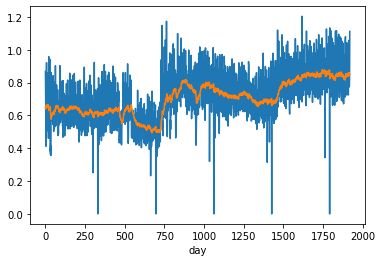

In [34]:
model = ETS_model('subcat_id', 'Beauty_1', train_df_agg_long, 'unit_sales', 'day')
orig_dataset = model._prep_dataset()
fitted_model = model.fit_model()
orig_dataset.plot()
fitted_model.fittedvalues.plot()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.44643D-01    |proj g|=  9.99000D-02

At iterate    1    f= -6.56226D-01    |proj g|=  3.40111D-01

At iterate    2    f= -6.61140D-01    |proj g|=  1.37692D-01

At iterate    3    f= -6.62675D-01    |proj g|=  1.60808D-01

At iterate    4    f= -6.62718D-01    |proj g|=  3.17254D-01

At iterate    5    f= -6.63630D-01    |proj g|=  4.20836D-01

At iterate    6    f= -6.64223D-01    |proj g|=  3.81215D-01

At iterate    7    f= -6.68230D-01    |proj g|=  8.16099D-01

At iterate    8    f= -6.71032D-01    |proj g|=  5.93882D-02

At iterate    9    f= -6.73236D-01    |proj g|=  9.58860D-01

At iterate   10    f= -6.73371D-01    |proj g|=  2.57369D-01
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate   11    f= -6.73782D-01    |proj g|=  1.06994D+00
  Positive dir de

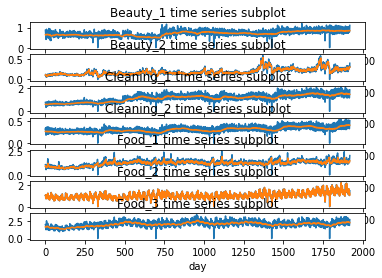

In [37]:
a = 7 #no rows
b = 1 #no cols
c = 1 #init plot counter
for i, subcat in enumerate(subcat_id):
    plt.subplot(a, b, c)
    plt.title('{} time series subplot'.format(subcat))
    plt.xlabel(i)
    model = ETS_model('subcat_id', subcat, train_df_agg_long, 'unit_sales', 'day')
    orig_dataset = model._prep_dataset()
    fitted_model = model.fit_model()
    orig_dataset.plot()
    fitted_model.fittedvalues.plot()
    c += 1